# Домашнє завдання №2
# Частина друга: Аналіз файлів

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Прочитати файл 2017_jun_final.csv за допомогою методу read_csv:

In [2]:
df = pd.read_csv("2017_jun_final.csv")

## Прочитати отриману таблицю, використовуючи метод head:

In [3]:
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

## Визначити розмір таблиці за допомогою методу shape:

In [4]:
print(df.shape)

(8704, 25)


## Визначити типи всіх стовпців за допомогою dataframe.dtypes:

In [5]:
print(df.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

## Яка частка пропусків міститься в кожній колонці:

In [6]:
print("Missing values:\n", df.isnull().sum() / len(df))

Missing values:
 N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.

## Видалити усі стовпці з пропусками, крім стовпця "Мова програмування":

In [7]:
df = df.drop(columns=['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls'])

## Знову порахуємо, яка частка пропусків міститься в кожній колонці:

In [8]:
print("Missing values:\n", df.isnull().sum() / len(df))

Missing values:
 N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Еще.студент                         0.000000
Уровень.английского                 0.000000
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64


## Видалити усі рядки у вихідній таблиці за допомогою методу dropna:

In [9]:
df = df.dropna()

## Визначити новий розмір таблиці за допомогою методу shape:

In [10]:
df.shape

(4854, 20)

## Створити нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python:

In [11]:
python_data = df[df['Язык.программирования'] == 'Python']

## Визначити розмір таблиці python_data за допомогою методу shape

In [12]:
python_data.shape

(207, 20)

## Використовуючи метод groupby, виконати групування за стовпчиком "Посада":

In [13]:
grouped_data = python_data.groupby('Должность')
print(grouped_data['Должность'].head())

12             Software Engineer
68             Software Engineer
87      Junior Software Engineer
114     Junior Software Engineer
143     Junior Software Engineer
153            Software Engineer
162     Junior Software Engineer
171     Junior Software Engineer
217            Software Engineer
302     Senior Software Engineer
373     Senior Software Engineer
387            Software Engineer
1172    Senior Software Engineer
1363    Senior Software Engineer
1489    Senior Software Engineer
2632              Technical Lead
3145              Technical Lead
3935              Technical Lead
4323              Technical Lead
4746              Technical Lead
5748            System Architect
8228            System Architect
Name: Должность, dtype: object


## Створити новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконати агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [14]:
aggregated_data = grouped_data.agg({'Зарплата.в.месяц': ['min', 'max']})
print(aggregated_data)

                         Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200


## Створити функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використати її для методу apply та створити новий стовпчик "avg":

In [15]:
def fill_avg_salary(group):
    avg = group['Зарплата.в.месяц'].mean()
    return round(avg, 2)

aggregated_data['avg'] = grouped_data.apply(fill_avg_salary)
print(aggregated_data)

                         Зарплата.в.месяц            avg
                                      min   max         
Должность                                               
Junior Software Engineer              100  1250   560.84
Senior Software Engineer             1300  9200  3387.10
Software Engineer                     500  5400  1799.07
System Architect                     3000  5000  4000.00
Technical Lead                       1425  6200  3165.91


## Створити описову статистику за допомогою методу describe для нового стовпчика:

In [16]:
avg_stats = aggregated_data['avg'].describe()
print(avg_stats)

count       5.000000
mean     2582.584000
std      1387.256855
min       560.840000
25%      1799.070000
50%      3165.910000
75%      3387.100000
max      4000.000000
Name: avg, dtype: float64


## Зберегти отриману таблицю в CSV файл:

In [17]:
aggregated_data['Посада'] = aggregated_data.index
aggregated_data.to_csv('aggregated_data.csv', index=False)

# Візуалізація даних

## Розподіл розробників за статтю

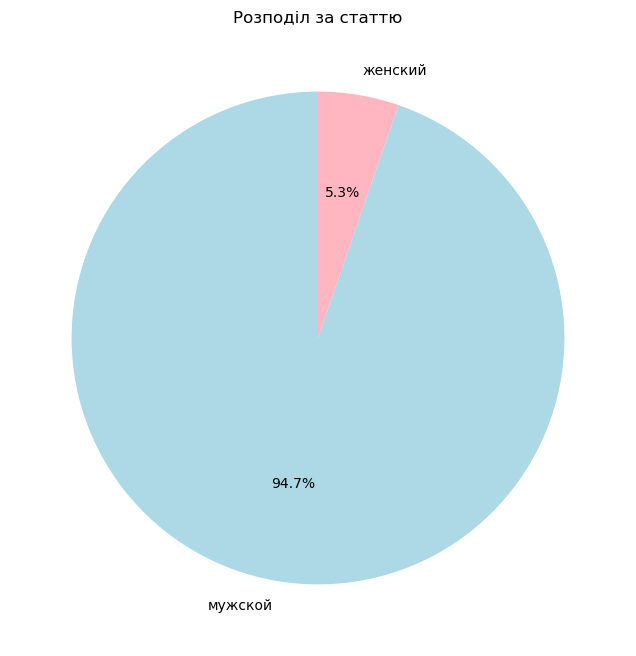

In [19]:
gender_distribution = df['Пол'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Розподіл за статтю')
plt.show()

## Розподіл рівня англійської мови серед респондентів

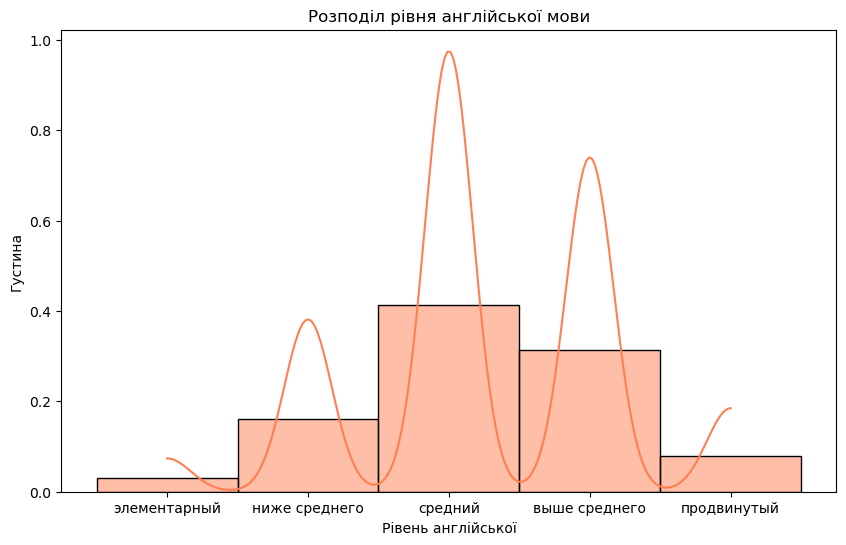

In [22]:
english_levels_order = ['элементарный', 'ниже среднего', 'средний', 'выше среднего', 'продвинутый']

df['Уровень.английского'] = df['Уровень.английского'].astype('category')
df['Уровень.английского'] = df['Уровень.английского'].cat.reorder_categories(english_levels_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Уровень.английского', stat='density', kde=True, color='coral', fill=True)
plt.title('Розподіл рівня англійської мови')
plt.xlabel('Рівень англійської')
plt.ylabel('Густинa')
plt.show()

## Розподіл зарплат розробників Python

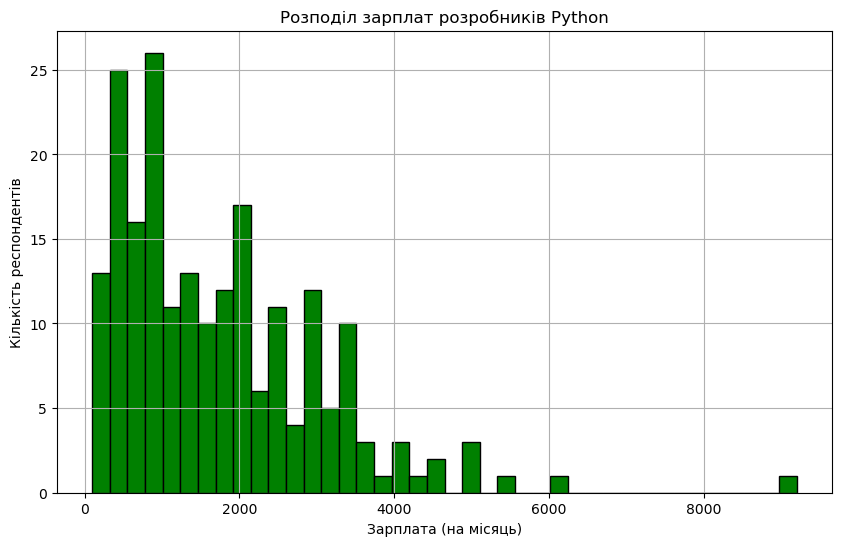

In [29]:
plt.figure(figsize=(10, 6))
python_data['Зарплата.в.месяц'].hist(bins=40, color='green', edgecolor='black')
plt.title('Розподіл зарплат розробників Python')
plt.xlabel('Зарплата (на місяць)')
plt.ylabel('Кількість респондентів')
plt.show()

## Взаємозв'язок зарплати та рівня англійської серед розробників Python

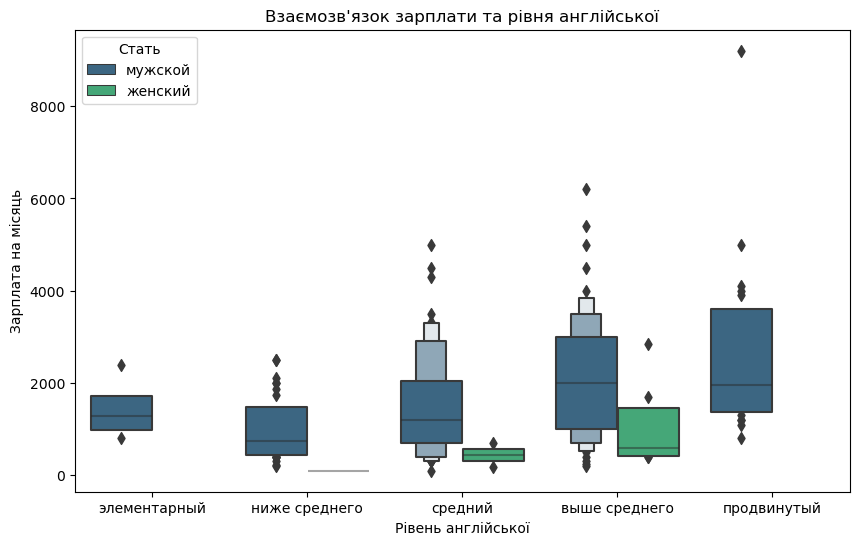

In [30]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Уровень.английского', y='Зарплата.в.месяц', data=python_data, hue='Пол', palette='viridis')
plt.title('Взаємозв\'язок зарплати та рівня англійської')
plt.xlabel('Рівень англійської')
plt.ylabel('Зарплата на місяць')
plt.legend(title='Стать')
plt.show()